# **Tutorial 2** - scientific Python ecosystem: `pandas` and `GeoPandas`

In this tutorial we will learn using
 1. [**pandas**](https://pandas.pydata.org/docs/): **tabular data** stored in ``pandas.DataFrame``s
 2. [**GeoPandas**](https://geopandas.org/en/stable/docs.html): **aspatial data** stored in ``geopandas.GeoDataFrame``s

within [`PyGMT`](https://www.pygmt.org) to create histograms and different maps.

-----
This tutorial is part of the AGU2024 annual meeting GMT/PyGMT pre-conference workshop (PREWS9) **Mastering Geospatial Visualizations with GMT/PyGMT**
- Conference: https://agu.confex.com/agu/agu24/meetingapp.cgi/Session/226736
- GitHub: https://github.com/GenericMappingTools/agu24workshop
- Website: https://www.generic-mapping-tools.org/agu24workshop
- Recommended version: PyGMT v0.13.0 with GMT 6.5.0

## 0. General stuff

Import the required packages, besides [`PyGMT`](https://www.pygmt.org) itself, we use [`pandas`](https://pandas.pydata.org/docs/) and [`GeoPandas`](https://geopandas.org/en/stable/docs.html):

In [1]:
import pygmt

import pandas as pd
import geopandas as gpd

# Use a resolution of only 150 dpi for the images within the Jupyter nootebook, to keep the file small
img_dpi = 150

## 1. `pandas`

### 1.1 Tabular data - `pandas.DataFrame`

Use an example dataset with tabular data provided by `PyGMT` and load it into a `pandas.DataFrame`. This dataset contains earthquakes in the area of Japan.

In [2]:
df_jp_eqs = pygmt.datasets.load_sample_data(name="japan_quakes")
df_jp_eqs.head()

,year,month,day,latitude,longitude,depth_km,magnitude
0,1987,1,4,49.77,149.29,489,4.1
1,1987,1,9,39.90,141.68,67,6.8
2,1987,1,9,39.82,141.64,84,4.0
3,1987,1,14,42.56,142.85,102,6.5
4,1987,1,16,42.79,145.10,54,5.1


### 1.2 Create a Cartesian histogram

First we create a Cartesian histogram for the moment magnitude distribution of all earthquakes in the dataset.

In [3]:
mag_min = df_jp_eqs["magnitude"].min(); print(mag_min)
mag_max = df_jp_eqs["magnitude"].max(); print(mag_max)

4.0
6.8


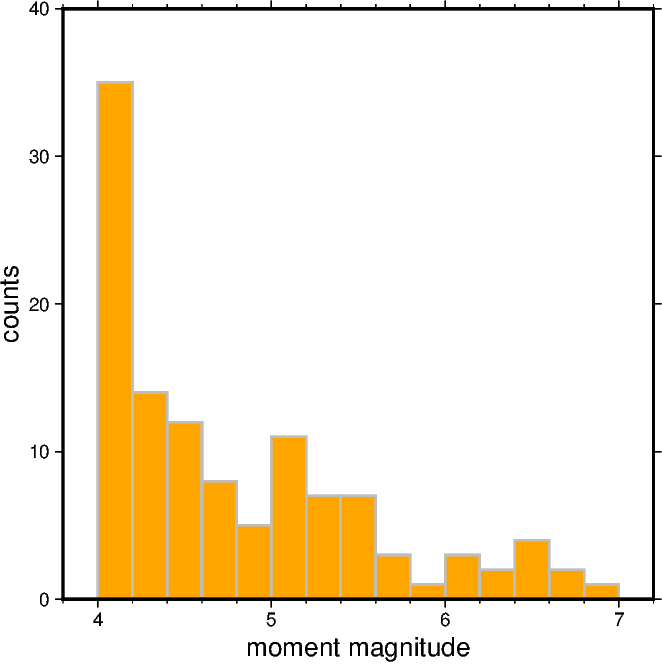

In [4]:
# Choose the bin width of the bars; feel free to play around with this value
step_histo = 0.2

fig = pygmt.Figure()

fig.histogram(
    data=df_jp_eqs["magnitude"],
    projection="X10c",
    # Determine y range automatically
    region=[mag_min - step_histo, mag_max + step_histo * 2, 0, 0],
    # Define the frame, add labels to the x-axis and y-axis
    frame=["WSne", "x+lmoment magnitude", "y+lcounts"],
    # Generate evenly spaced bins
    series=step_histo,
    # Fill bars with color "orange"
    fill="orange",
    # Draw gray outlines with a width of 1 point
    pen="1p,gray",
    # Choose histogram type 0, i.e., counts [Default]
    histtype=0,
)

fig.show(dpi=img_dpi)

Use code example above as orientation, and create a similar histogram showing the hypocentral depth distribution for all earthquakes in the dataset.

In [5]:
# Your code (:

For details on creating Cartesian histograms you may find the tutorial [**Cartesian histograms**](https://www.pygmt.org/v0.13.0/tutorials/advanced/cartesian_histograms.html) helpful.

### 1.3 Create a geographical map of the earthquakes

Now it's time to create a geographical map showing the earthquakes. You can start with using [`pygmt.Figure.coast`](https://www.pygmt.org/v0.13.0/api/generated/pygmt.Figure.coast.html) and [`pygmt.Figure.plot`](https://www.pygmt.org/v0.13.0/api/generated/pygmt.Figure.plot.html). For plotting the earthquakes as size (moment magnitude) and color (hypocentral depth) coded circles on top of the map please follow the tutorial [**Plotting data points**](https://www.pygmt.org/v0.13.0/tutorials/basics/plot.html).

In [6]:
# Your code (:

## 2. `GeoPandas`

### 2.1 Line geometry

Features which can be represented as a **line geometry** are for example rivers, roads, national boundaries, shorlines, and any kind of profiles.

#### 2.1.1 Aspatial Data - `geopandas.GeoDataFrame` with line geometry

First we download some data into in a `geopandas.GeoDataFrame`. This dataset contains European rivers with its length and name.

In [7]:
gpd_rivers_org = gpd.read_file(
    "https://www.eea.europa.eu/data-and-maps/data/wise-large-rivers-and-large-lakes/" + \
    "zipped-shapefile-with-wise-large-rivers-vector-line/zipped-shapefile-with-wise-large-rivers-vector-line/" + \
    "at_download/file/wise_large_rivers.zip"
)
gpd_rivers_org.head()

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((4185683.29 2775788.04, 41861..."
1,Douro,8.162452e+05,"MULTILINESTRING ((2764963.81 2199037.624, 2766..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((3178371.814 2315100.781, 317..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((4235352.373 3422319.986, 423..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((2859329.283 1682737.074, 286..."


Have a look at the values in the geometry column. The coordinates are currently not given in the geographic coordinate reference system (longitude/latitude) and have to be converted. This can be done directly with `GeoPandas`.

In [8]:
gpd_rivers_org.crs
gpd_rivers = gpd_rivers_org.to_crs('EPSG:4326')
gpd_rivers.head()

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((8.1846 48.0807, 8.19049 48.0..."
1,Douro,8.162452e+05,"MULTILINESTRING ((-8.67141 41.14934, -8.64362 ..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((-4.05971 42.97715, -4.06841 ..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((8.69715 53.90109, 8.72716 53..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((-6.37899 36.80363, -6.34806 ..."


#### 2.1.2 Create a geographical map of the rivers

Let's plot the rivers represented on top of a map. The `geopandas.DataFrame` can be directly passed to the `data` parameter of [`pygmt.Figure.plot`](https://www.pygmt.org/v0.13.0/api/generated/pygmt.Figure.plot.html). Use the `pen` parameter to adjust the lines. The string argument has the form "*width*,*color*,*style*". Different line styles are explained in the Gallery example [**Line styles**](https://www.pygmt.org/v0.13.0/gallery/lines/linestyles.html).

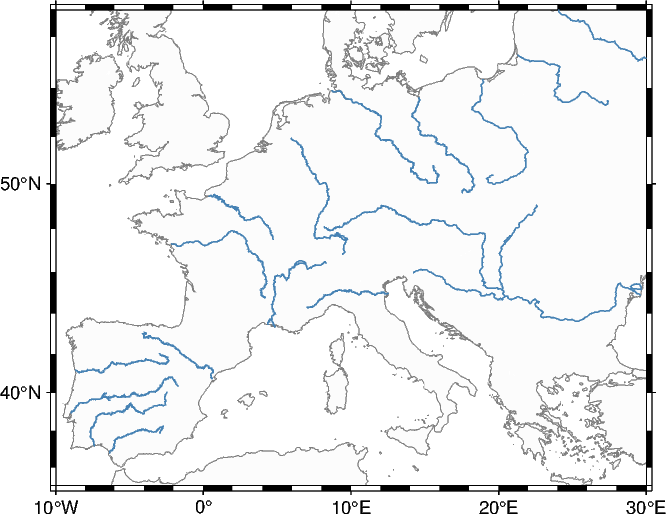

In [9]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 30, 35, 57],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)

fig.plot(data=gpd_rivers, pen="0.5p,steelblue,solid")

fig.show(dpi=img_dpi)

#### 2.1.3 Plot subsets of the rivers differently

Now we want to filter the dataset based on the river length and plot the subsets differently.

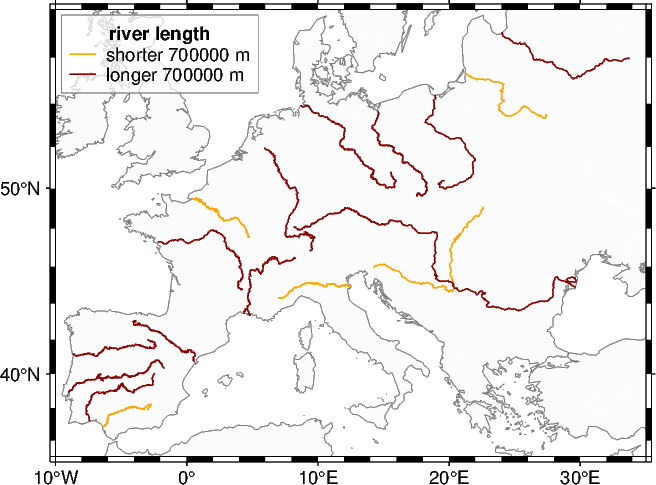

In [10]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 35, 35, 58],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)

# Split the dataset into two subsets of shorter and longer rivers
# Feel free to play around with the limit
len_limit = 700000  # in meters
gpd_rivers_short = gpd_rivers[gpd_rivers["Shape_Leng"] < len_limit]
gpd_rivers_long = gpd_rivers[gpd_rivers["Shape_Leng"] > len_limit]

# Add a heading (+H) to the legend and adjust the font size (+f) to 9 points
fig.plot(data=gpd_rivers_short, pen="0.5p,orange", label=f"shorter {len_limit} m+Hriver length+f9p")
fig.plot(data=gpd_rivers_long, pen="0.5p,darkred", label=f"longer {len_limit} m")

fig.legend(position="jLT+o0.1c", box="+gwhite@30+p0.1p,gray50")

fig.show(dpi=img_dpi)

#### 2.1.4 Plot the rivers with color-coding for the river length

Use the gallery example [**Line colors with a custom CPT**](https://www.pygmt.org/v0.13.0/gallery/lines/line_custom_cpt.html) to plot the rivers with color-coding for the river length.

In [11]:
# Your code (:

### 2.2 Polygon geometry

Any kind of areas, like continents, countries, and states can be stored as **polygon geometry**.

#### 2.2.1 Aspatial Data - `geopandas.GeoDataFrame` with polygon geometry

Again we download some data into in a `geopandas.GeoDataFrame`. This dataset contains information regarding airbnb rentals, socioeconomics, and crime in Chicagos.
This time we are lucky and the data is directly provided in the geographic coordinate reference system (longitude/latitude) and no further coordinate transformation is needed.

In [12]:
gdf_airbnb = gpd.read_file("https://geodacenter.github.io/data-and-lab/data/airbnb.zip")
gdf_airbnb.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017..."
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165..."
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


#### 2.2.2 Create a choropleth map

Here we are going to create a so-called **choropleth map**. Such a visualization is helpful to show a quantity which vary between subregions of a study area, e.g., countries or states. The dataset contains several columns, here we will focus on the column ``"population"``, but feel free to modifiy the code below and use another quantity for the color-coding!

In [13]:
popul_min = gdf_airbnb["population"].min(); print(popul_min)
popul_max = gdf_airbnb["population"].max(); print(popul_max)

2876
98514


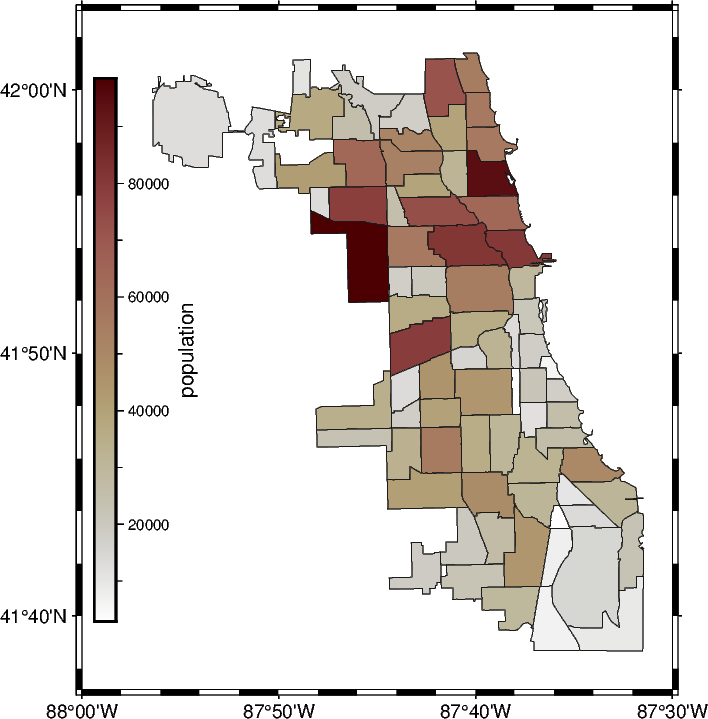

In [14]:
fig = pygmt.Figure()

# frame=True adds a frame using the default settings
# Use "rltb" (right, left, top, bottom) to plot no frame at all which
# can be usefull when inserting the figure within a document
fig.basemap(region=[-88, -87.5, 41.62, 42.05], projection="M10c", frame=True)

# Set up colormap
pygmt.makecpt(cmap="SCM/bilbao", series=[popul_min, popul_max, 10])
# Add vertical colorbar at left side
fig.colorbar(frame="x+lpopulation", position="jLM+v")

# Plot the polygons with color-coding for the population
fig.plot(
    data=gdf_airbnb, 
    pen="0.2p,gray10", 
    fill="+z", 
    cmap=True,
    aspatial="Z=population",
)

fig.show(dpi=img_dpi)

## 3. Additional comments

Some helpful and interesting aspects:

- Use suitable colormaps for your data: [**Scientific colourmaps by Fabio Crameri**](https://www.fabiocrameri.ch/colourmaps/), see also the publications [Crameri et al. 2024](https://doi.org/10.1002/cpz1.1126) and [Crameri et al. 2020](https://doi.org/10.1038/s41467-020-19160-7)
- Datasets provided by `GeoPandas`: Checkout the [**geodatasets**](https://geodatasets.readthedocs.io) libaray
- Convert other objects to `pandas` or `GeoPandas` objects to make them usable in `PyGMT`: For example, convert [**OSMnx**](https://osmnx.readthedocs.io)'s `MultiDiGraph` to a `geopandas.DataFrame`
- Create more complex geometries: Combine `GeoPandas` with [**shapely**](https://shapely.readthedocs.io) (i.e., `from shapely.geometry import Polygon`)
- Support of OGR formats: Use [`geopandas.read_file`](https://geopandas.org/en/v1.0.1/docs/reference/api/geopandas.read_file.html) to load data provided as shapefile (.shp), GeoJSON (.geojson), geopackage (.gpkg), etc.

## 4. Orientation / suggestion for "2.1.4 Plot the rivers with color-coding for the river length"

Below you find a rough code shipset for plotting the rives with color-coding in section 2.1.4.

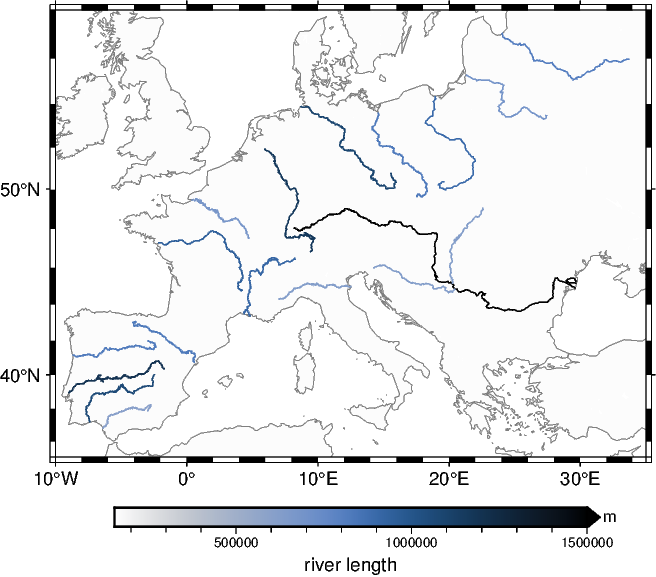

In [15]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 35, 35, 58],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)

pygmt.makecpt(cmap="SCM/oslo",series=[gpd_rivers.Shape_Leng.min(), 1500000], reverse=True)
fig.colorbar(frame=["x+lriver length", "y+lm"], position="+ef0.2c")

for i_river in range(len(gpd_rivers)):
    fig.plot(
        data=gpd_rivers[gpd_rivers.index==i_river],
        zvalue=gpd_rivers.loc[i_river, "Shape_Leng"],
        pen="0.5p",
        cmap=True,
    )

fig.show(dpi=img_dpi)